<a href="https://colab.research.google.com/github/douglholmes/FF_Data_Science_Practice/blob/main/VOR_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/74b84c5fb2371b954b52b4f67ae5220930d57861/fantasypros/fp_projections.csv')

In [ ]:
df = df.iloc[:, 1:]
df.head()

,Player,Team,Pos,Receptions,ReceivingYds,ReceivingTD,FL,RushingAtt,RushingYds,RushingTD,...,FieldGoalsAttempted,ExtraPointsMade,TotalSacks,TotalInt,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,FantasyPoints
0,Lamar Jackson,BAL,QB,0.0,0.0,0.0,2.4,160.8,967.8,5.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361.1
1,Patrick Mahomes,KC,QB,0.0,0.0,0.0,1.2,55.6,302.0,2.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,345.1
2,Dak Prescott,DAL,QB,0.0,0.0,0.0,2.3,64.4,261.4,3.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,318.5
3,Deshaun Watson,HOU,QB,0.0,0.0,0.0,1.8,92.9,491.2,4.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,312.7
4,Russell Wilson,SEA,QB,0.0,0.0,0.0,1.6,72.1,373.7,2.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308.5


In [ ]:
df.columns

Index(['Player', 'Team', 'Pos', 'Receptions', 'ReceivingYds', 'ReceivingTD',
       'FL', 'RushingAtt', 'RushingYds', 'RushingTD', 'PassingAtt',
       'PassingCmp', 'PassingYds', 'PassingTD', 'Int', 'FieldGoalsMade',
       'FieldGoalsAttempted', 'ExtraPointsMade', 'TotalSacks', 'TotalInt',
       'FumblesRecovered', 'FumblesForced', 'DefensiveTDs', 'SafetysForced',
       'PointsAllowed', 'FantasyPoints'],
      dtype='object')

In [ ]:
', '.join(df.columns)

'Player, Team, Pos, Receptions, ReceivingYds, ReceivingTD, FL, RushingAtt, RushingYds, RushingTD, PassingAtt, PassingCmp, PassingYds, PassingTD, Int, FieldGoalsMade, FieldGoalsAttempted, ExtraPointsMade, TotalSacks, TotalInt, FumblesRecovered, FumblesForced, DefensiveTDs, SafetysForced, PointsAllowed, FantasyPoints'

In [ ]:
scoring_weights = {
    'receptions': 1,
    'receiving_yds': 0.1,
    'receiving_td': 6,
    'FL': -2,
    'rushing_yds': 0.1,
    'rushing_td': 0.1,
    'passing_yds': 0.04,
    'passing_td': 4,
    'int': -2,
}

df['FatasyPoints'] = (df['Receptions']*scoring_weights['receptions'] + df['ReceivingYds']*scoring_weights['receiving_yds'] + df['ReceivingTD']*scoring_weights['receiving_td'] + \
                      df['FL']*scoring_weights['FL'] + df['RushingTD']*scoring_weights['rushing_td'] + df['PassingTD']*scoring_weights['passing_td'] + \
                      df['PassingYds']*scoring_weights['passing_yds'] + df['Int']*scoring_weights['int']
                      )

In [ ]:
df['FatasyPoints']

0      230.124
1      298.664
2      270.446
3      235.448
4      256.932
        ...   
681      0.000
682      0.000
683      0.000
684      0.000
685      0.000
Name: FatasyPoints, Length: 686, dtype: float64

In [ ]:
rb_df = df.loc[df['Pos'] == 'RB', ['Player', 'Team', 'Pos', 'Receptions', 'ReceivingYds']]

rb_df.head()

,Player,Team,Pos,Receptions,ReceivingYds
12,Christian McCaffrey,CAR,RB,102.8,855.8
23,Saquon Barkley,NYG,RB,66.2,536.9
25,Ezekiel Elliott,DAL,RB,59.3,468.6
26,Derrick Henry,TEN,RB,21.5,183.7
30,Dalvin Cook,MIN,RB,58.1,519.8


In [ ]:
df.sort_values(by='RushingYds', ascending=False).head(15)

,Player,Team,Pos,Receptions,ReceivingYds,ReceivingTD,FL,RushingAtt,RushingYds,RushingTD,...,ExtraPointsMade,TotalSacks,TotalInt,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,FantasyPoints,FatasyPoints
26,Derrick Henry,TEN,RB,21.5,183.7,1.0,2.4,294.8,1481.1,12.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,239.9,42.280
25,Ezekiel Elliott,DAL,RB,59.3,468.6,2.6,2.6,288.0,1261.9,9.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,240.3,117.510
37,Nick Chubb,CLE,RB,24.8,191.5,1.1,2.1,275.4,1251.9,8.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,47.240
23,Saquon Barkley,NYG,RB,66.2,536.9,2.7,1.5,271.2,1237.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,244.6,133.990
41,Josh Jacobs,LV,RB,28.5,222.1,0.8,2.0,267.4,1186.3,8.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194.1,52.390
36,Joe Mixon,CIN,RB,39.7,306.2,1.7,1.8,269.5,1178.6,7.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201.6,77.690
30,Dalvin Cook,MIN,RB,58.1,519.8,1.9,2.7,262.7,1151.0,9.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,231.9,117.060
12,Christian McCaffrey,CAR,RB,102.8,855.8,4.5,2.2,252.7,1130.8,8.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,272.2,211.830
45,Chris Carson,SEA,RB,31.5,245.1,1.3,2.4,244.0,1100.6,7.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,183.9,59.790
38,Miles Sanders,PHI,RB,51.7,462.6,2.4,2.1,234.7,1050.6,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,197.5,108.760


In [ ]:
rb_df = df.loc[df['Pos'] == 'RB']
rb_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Receptions,155.0,17.506452,18.480993,0.40,4.050,10.60,24.00,102.80
ReceivingYds,155.0,140.300645,153.581122,3.10,30.300,85.70,198.10,855.80
ReceivingTD,155.0,0.708387,0.882143,0.00,0.100,0.30,1.00,4.50
FL,155.0,0.712903,0.757106,0.00,0.000,0.50,1.30,2.70
RushingAtt,155.0,78.225161,82.304474,0.00,6.750,46.70,137.90,294.80
RushingYds,155.0,334.525161,359.322937,2.50,45.800,176.70,559.90,1481.10
RushingTD,155.0,2.428387,2.723008,0.00,0.300,1.20,3.90,12.10
PassingAtt,155.0,0.000000,0.000000,0.00,0.000,0.00,0.00,0.00
PassingCmp,155.0,0.000000,0.000000,0.00,0.000,0.00,0.00,0.00
PassingYds,155.0,0.000000,0.000000,0.00,0.000,0.00,0.00,0.00


In [ ]:
rb_df['RushingAtt'].max()

294.8

In [ ]:
rb_df['RushingAtt'].std()


82.30447400184613

In [ ]:
rb_df['RushingAtt'].min()

0.0

In [ ]:
rb_df['RushingAtt'].quantile(0.60)

74.53999999999999

In [ ]:
rb_df['RushingAtt'].quantile(0.20)

4.5

In [ ]:
rb_df['RushingTDRank'] = rb_df['RushingTD'].rank(ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
rb_df.sort_values(by='RushingTDRank')['Player']

26        Derrick Henry
30          Dalvin Cook
25      Ezekiel Elliott
39          Aaron Jones
23       Saquon Barkley
             ...       
604        Nick Bellore
533         Tyler Ervin
598     Anthony Sherman
636       Jakob Johnson
667    Damarea Crockett
Name: Player, Length: 155, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


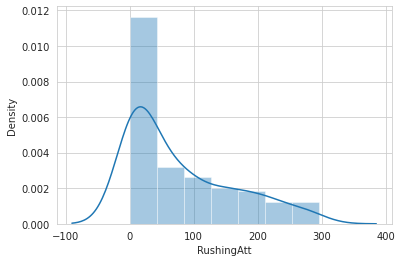

In [ ]:
import seaborn as sns

sns.set_style('whitegrid')

sns.distplot(rb_df['RushingAtt']);

In [ ]:
rb_df.values

array([['Christian McCaffrey', 'CAR', 'RB', ..., 272.2,
        211.82999999999998, 8.0],
       ['Saquon Barkley', 'NYG', 'RB', ..., 244.6, 133.99, 5.0],
       ['Ezekiel Elliott', 'DAL', 'RB', ..., 240.3, 117.50999999999999,
        3.0],
       ...,
       ['Elijah McGuire', 'KC', 'RB', ..., 1.2, 1.4900000000000002,
        148.5],
       ['Trenton Cannon', 'CAR', 'RB', ..., 1.1, 1.4000000000000001,
        148.5],
       ['Damarea Crockett', 'GB', 'RB', ..., 0.7, 0.7100000000000001,
        148.5]], dtype=object)

In [31]:
adp_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/fantasypros/adp/PPR_ADP.csv', index_col=0)

In [33]:
adp_df.head()

,PLAYER,POS,AVG,ADP RANK
0,Christian McCaffrey,RB,1.0,1.0
1,Saquon Barkley,RB,2.0,2.0
2,Ezekiel Elliott,RB,3.5,3.0
3,Michael Thomas,WR,4.0,4.0
4,Dalvin Cook,RB,5.0,5.0


In [32]:
adp_df['ADP RANK'] = adp_df['AVG'].rank()

adp_df.head()

,PLAYER,POS,AVG,ADP RANK
0,Christian McCaffrey,RB,1.0,1.0
1,Saquon Barkley,RB,2.0,2.0
2,Ezekiel Elliott,RB,3.5,3.0
3,Michael Thomas,WR,4.0,4.0
4,Dalvin Cook,RB,5.0,5.0


In [34]:
adp_df_cutoff = adp_df[:100]

In [35]:
adp_df_cutoff.shape

(100, 4)

In [36]:
replacement_players = {
    'RB': '',
    'QB': '',
    'WR': '',
    'TE': ''
}

for _, row in adp_df_cutoff.iterrows():
  position = row['POS']
  player = row['PLAYER']

  if position in replacement_players:
    replacement_players[position] = player